# Exercise 11.1
In this exercise it's requested to do a fit of a linear equation.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 16})

pesi =[]

def models(sig,N_train,N_epochs,ep=True):

    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    sigma =sig # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    # report training progress against validation data
    checkpoint_filepath = './checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        save_best_only=True)
    if (ep==True):
        for i in range(N_epochs):
            history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=i,
                  shuffle=True, # a good idea is to shuffle input before at each epoch,
                  verbose=0,
                  validation_data=(x_valid, y_valid))
            # return weights and biases
            pesi.append( model.get_weights())
            if(i==0 or i%5==0):
                x_predicted = np.random.uniform(-1, 1, 100)
                y_predicted = model.predict(x_predicted)
                plt.title('Fit all epoca {}'.format(i))
                plt.scatter(x_predicted, y_predicted,color='r')
                plt.plot(x_valid, y_target)
                plt.xlabel("x")
                plt.ylabel("y")
                plt.grid(True)
                plt.show()
    else:
        history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs,
                  shuffle=True, # a good idea is to shuffle input before at each epoch,
                  verbose=0,
                  validation_data=(x_valid, y_valid))
            # return weights and biases
        pesi.append( model.get_weights())
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.title('Fit dopo {} epoche con $\sigma$={}e N_elem= {}'.format(N_epochs,sig,N_train))
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.show()

2023-10-09 19:08:41.659270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 19:08:41.740697: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 19:08:41.763573: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 19:08:42.199380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

First thing to do is look how the model changes as the epochs progress, with fixed variance and number of points, a method to verify how good the fit is, is to check the distance between the real slope and the real intercept. This works only in the simple case of a linear fit.

4/4 [==============================] - 0s 868us/step


2023-10-09 19:08:45.615040: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-09 19:08:45.615147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-10-09 19:08:45.616616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


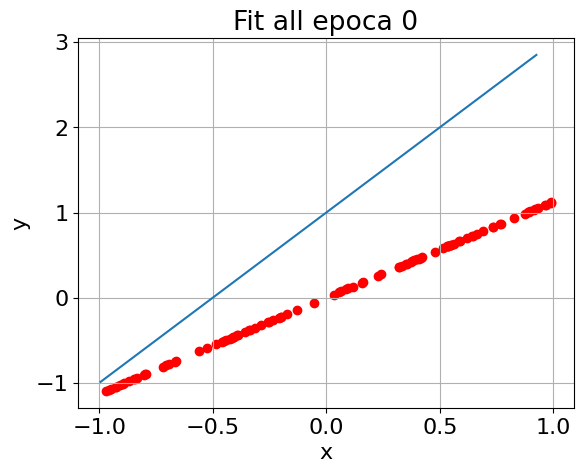

4/4 [==============================] - 0s 674us/step


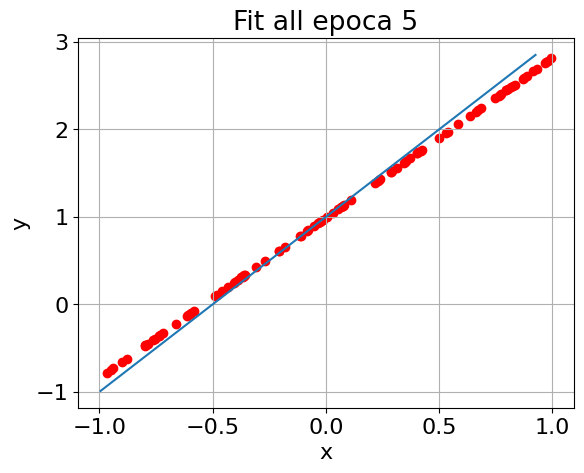

4/4 [==============================] - 0s 659us/step


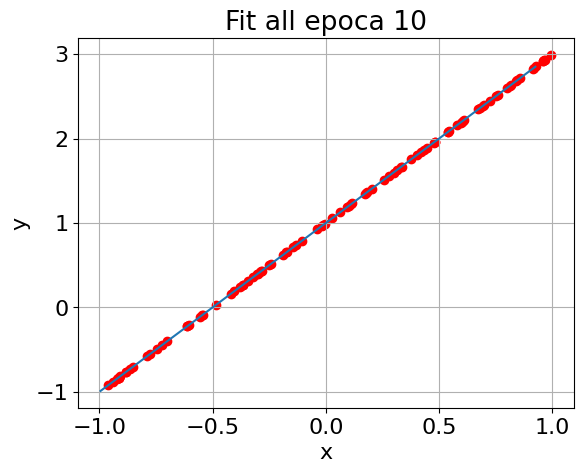

4/4 [==============================] - 0s 777us/step


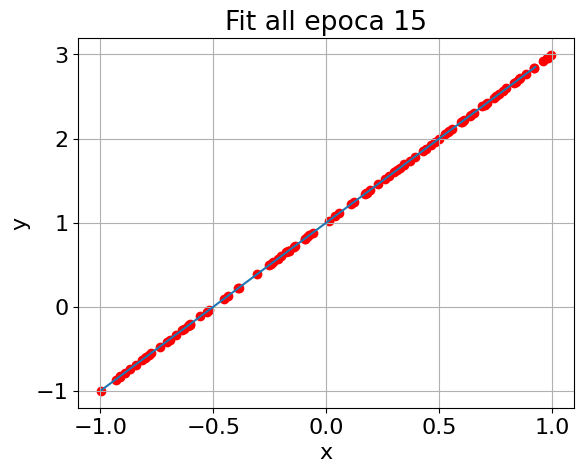

4/4 [==============================] - 0s 615us/step


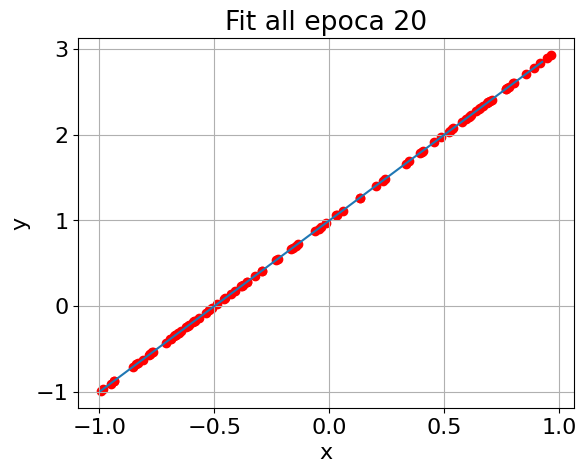

4/4 [==============================] - 0s 593us/step


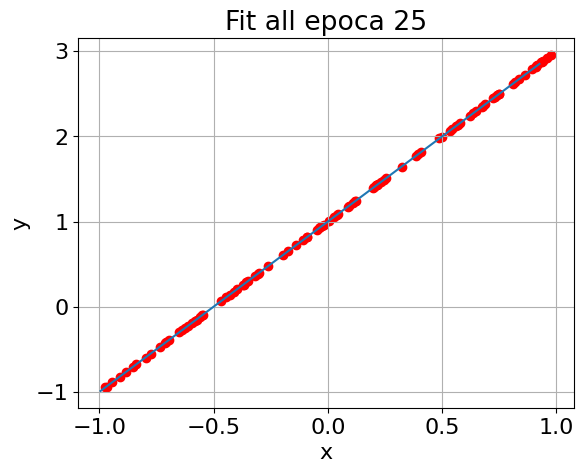

4/4 [==============================] - 0s 688us/step


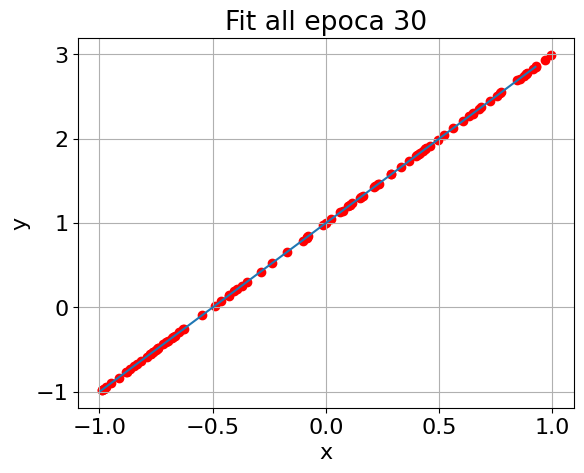

4/4 [==============================] - 0s 674us/step


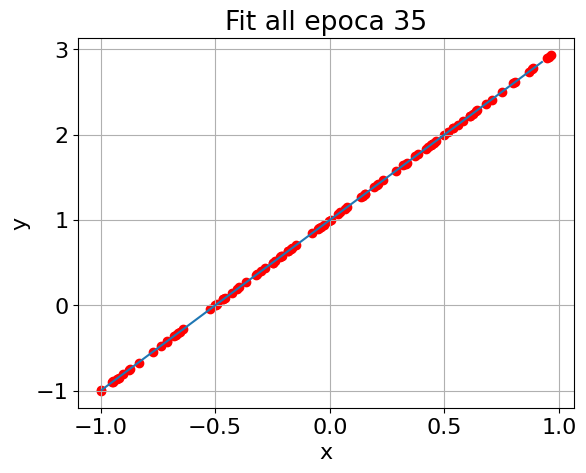

4/4 [==============================] - 0s 630us/step


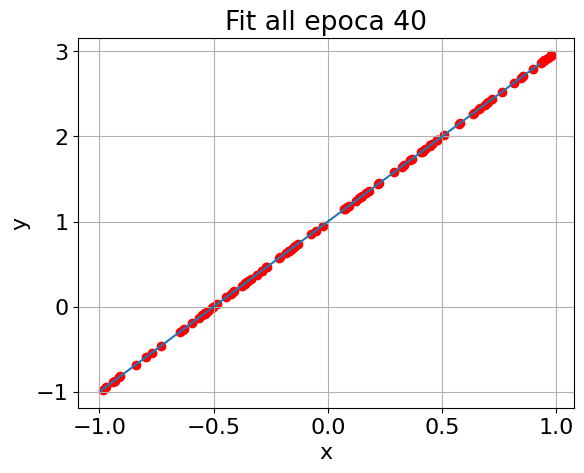

4/4 [==============================] - 0s 582us/step


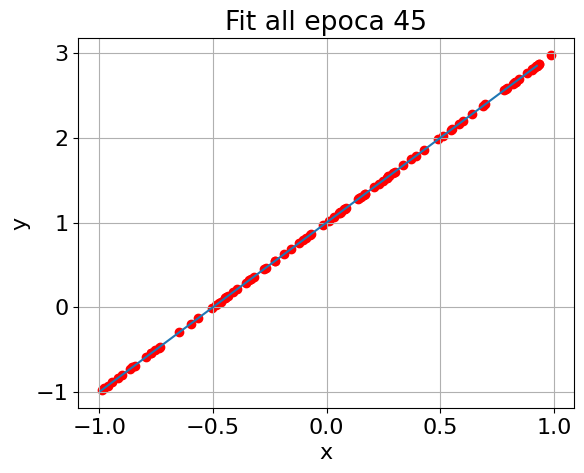

In [2]:
models(0.01,500,50)

4/4 [==============================] - 0s 726us/step


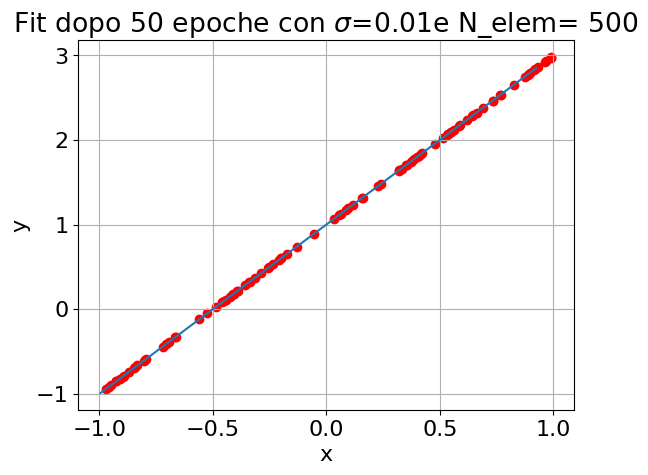

In [3]:
models(0.01,500,50,ep=False)

In [4]:
slope = []
interc = []
for i in range(50):
    slope.append(pesi[i][0][0][0])
    interc.append(pesi[i][1][0])


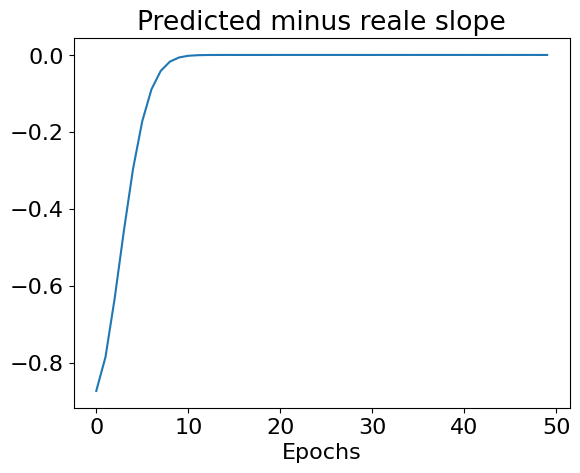

In [5]:
slope = [x-m for x in slope]
plt.title('Predicted minus reale slope')
plt.xlabel('Epochs')
plt.plot(slope)
plt.show()

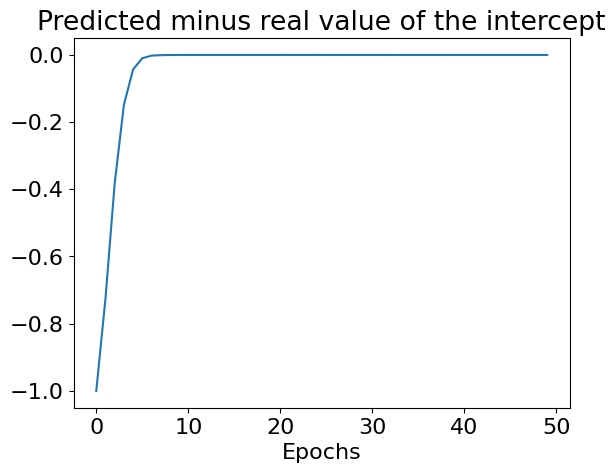

In [6]:
interc = [x-b for x in interc]
plt.title('Predicted minus real value of the intercept')
plt.xlabel('Epochs')
plt.plot(interc)
plt.show()

Here is clear that the model predicts the slope and the intercept quite nicely.\
now the epochs can be fixed to 50 (it seems a good number as any) and vary the number of point and the sigma

In [7]:
N_elem = np.linspace(100,1000,10).astype(int)
N_elem # creo array con la lunghezza dei dati che voglio

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

4/4 [==============================] - 0s 766us/step


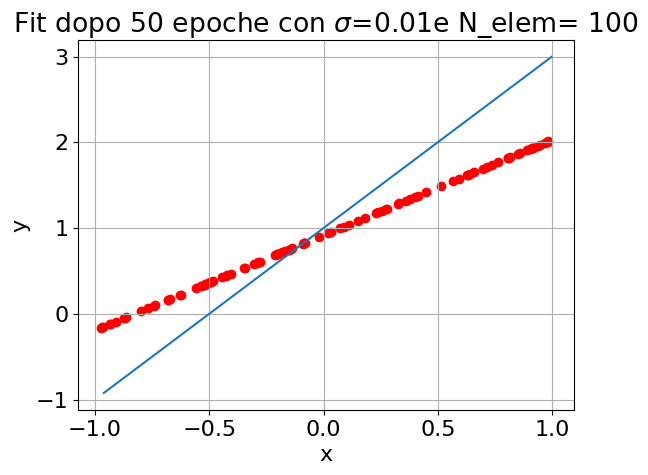

4/4 [==============================] - 0s 766us/step


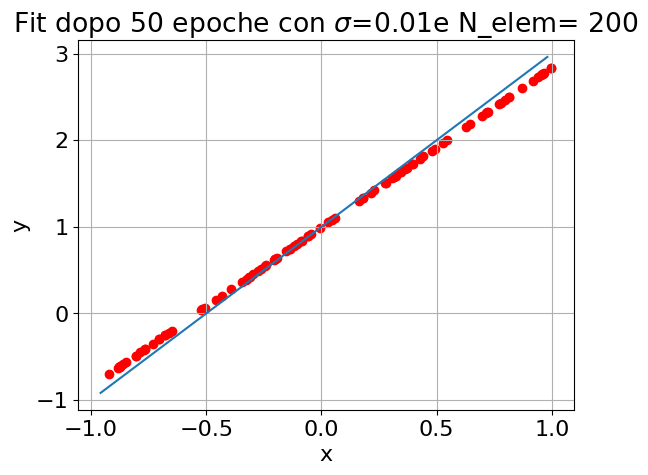

4/4 [==============================] - 0s 651us/step


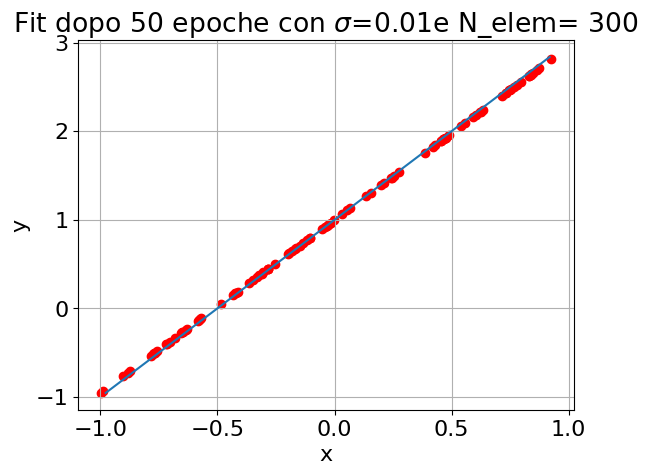

4/4 [==============================] - 0s 635us/step


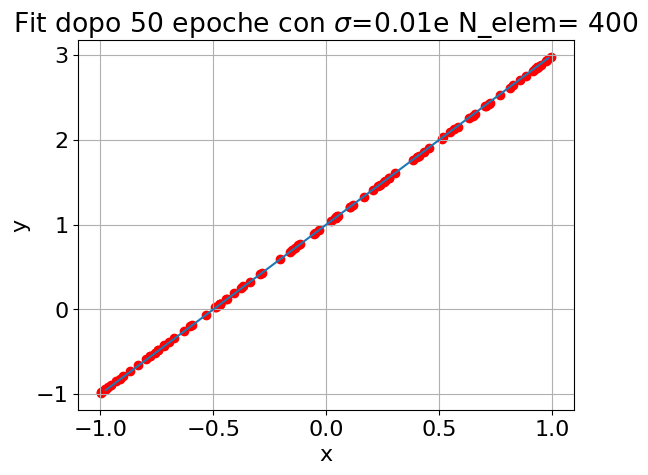

4/4 [==============================] - 0s 710us/step


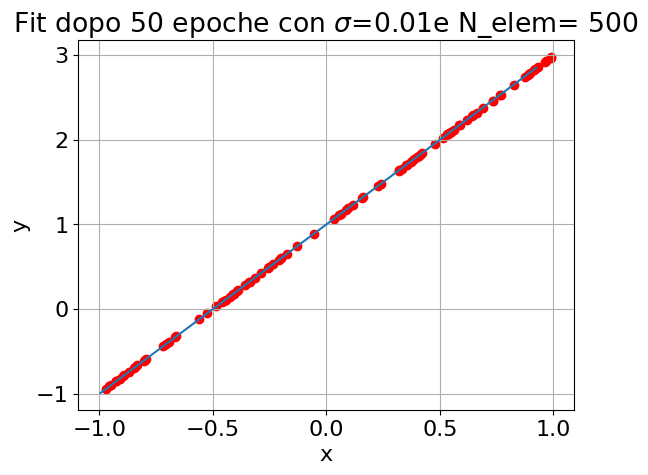

4/4 [==============================] - 0s 624us/step


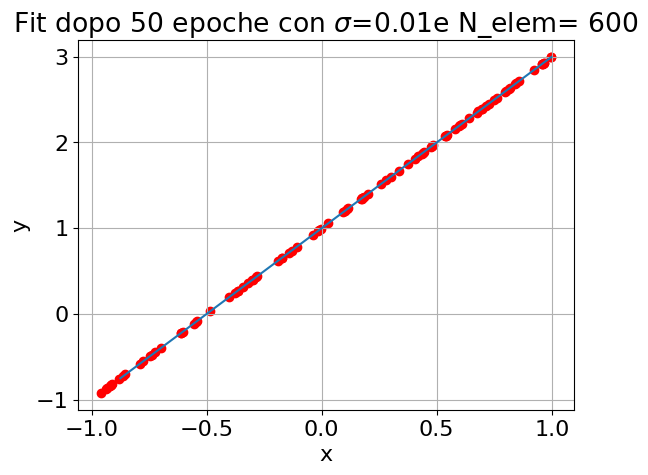

4/4 [==============================] - 0s 625us/step


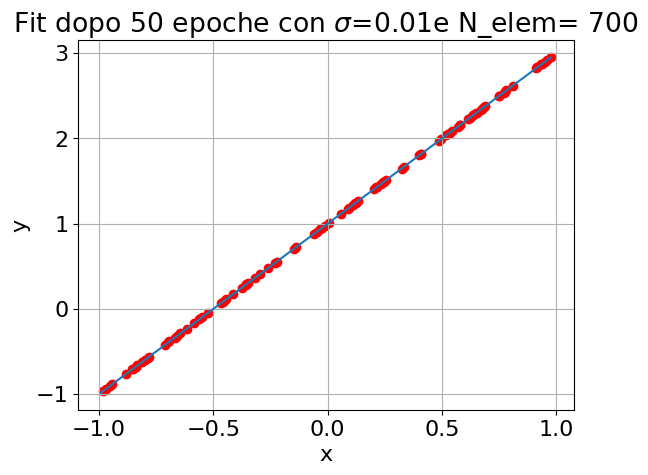

4/4 [==============================] - 0s 572us/step


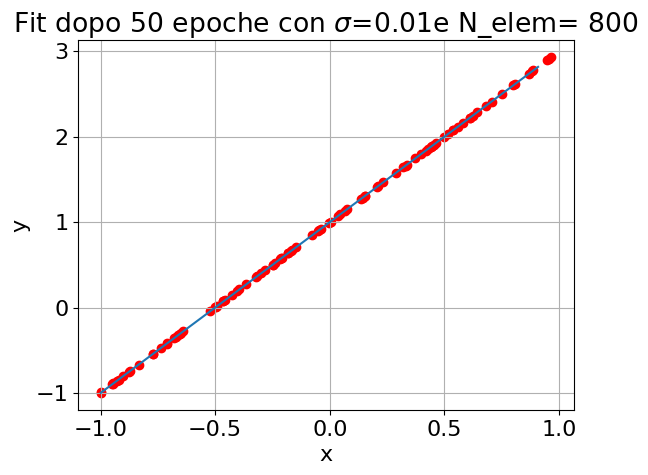

4/4 [==============================] - 0s 644us/step


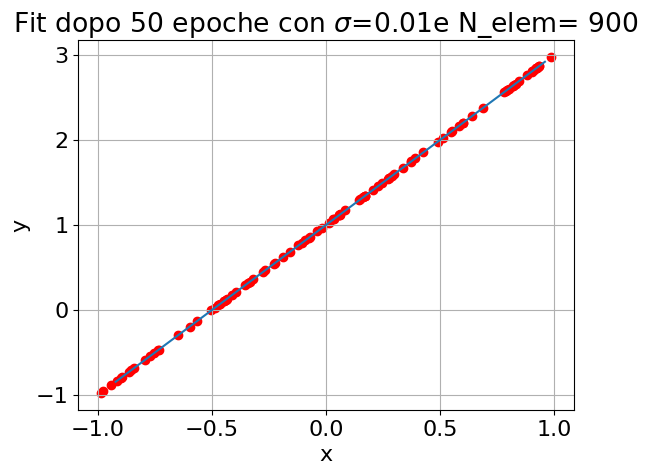

4/4 [==============================] - 0s 725us/step


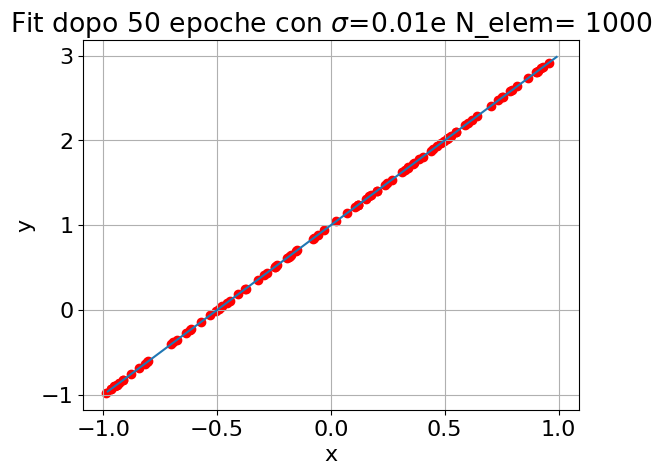

In [8]:
slope_N = []
interc_N = []
for i in range(len(N_elem)):
    models(0.01,N_elem[i],50,ep=False)
    slope_N.append(pesi[-1][0][0][0])
    interc_N.append(pesi[-1][1][0])

Therefore it seems that the more the data, the better the fit is

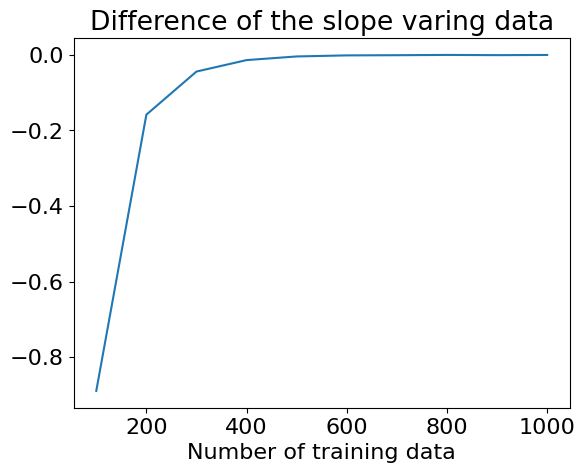

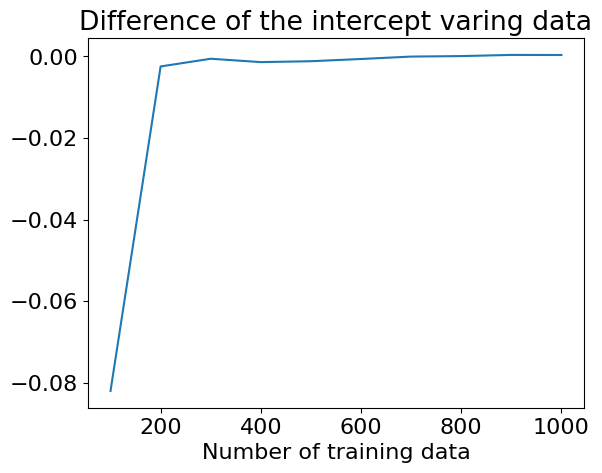

In [9]:
slope_N=[x-m for x in slope_N]
interc_N=[x-b for x in interc_N]
plt.title("Difference of the slope varing data")
plt.xlabel("Number of training data")
plt.plot(N_elem,slope_N)
plt.show()
plt.title("Difference of the intercept varing data")
plt.xlabel("Number of training data")
plt.plot(N_elem,interc_N)
plt.show()

As expected a bigger number of data leads to a better fit, now with $\sigma = 0.01$ the fit is quite good, now is curious to analyze what happens as the sigma increases.

In [10]:
sigma_N = np.linspace(0.0,1.5,10).round(2)
sigma_N

array([0.  , 0.17, 0.33, 0.5 , 0.67, 0.83, 1.  , 1.17, 1.33, 1.5 ])

4/4 [==============================] - 0s 808us/step


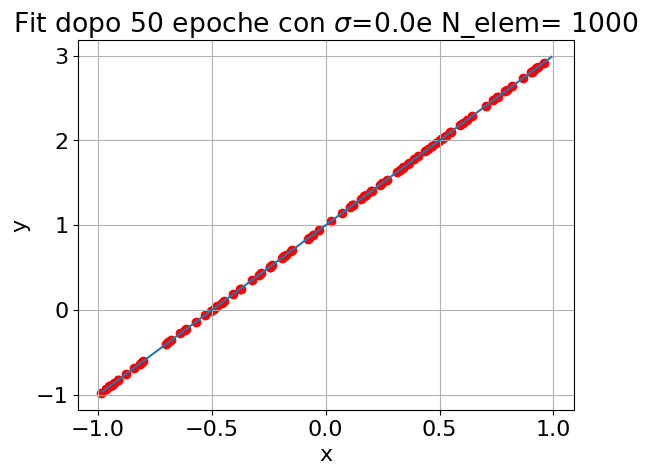

4/4 [==============================] - 0s 595us/step


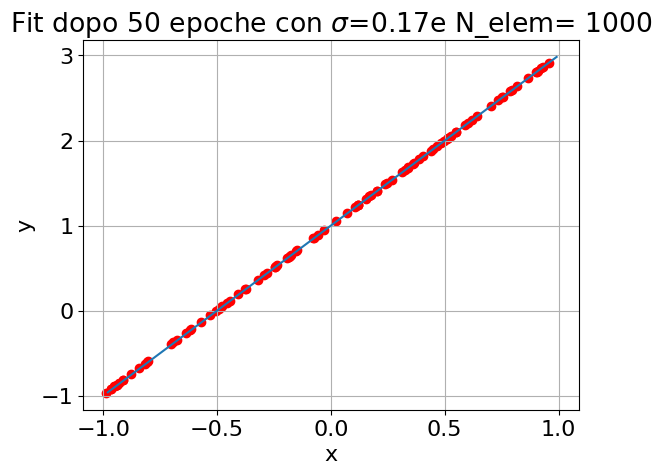

4/4 [==============================] - 0s 597us/step


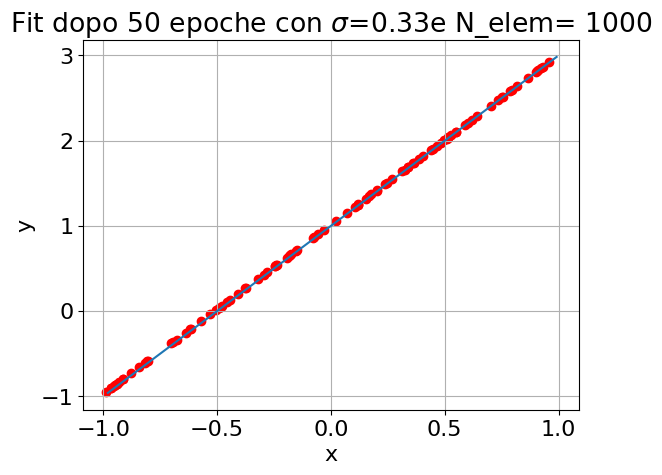

4/4 [==============================] - 0s 950us/step


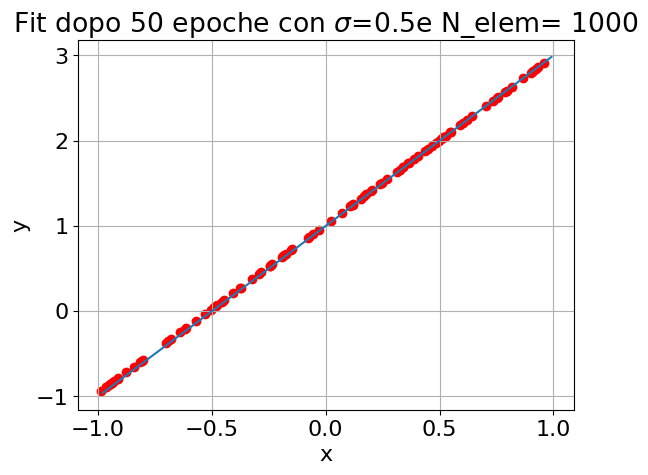

4/4 [==============================] - 0s 663us/step


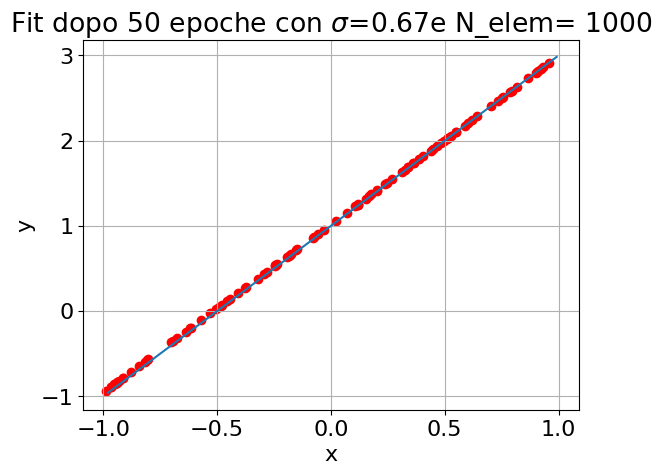

4/4 [==============================] - 0s 679us/step


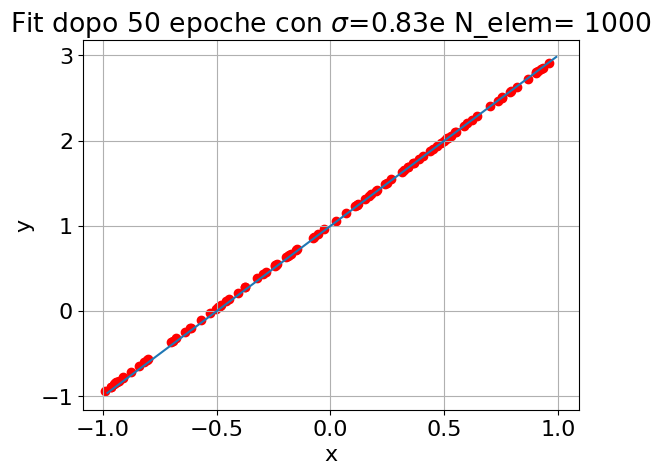

4/4 [==============================] - 0s 655us/step


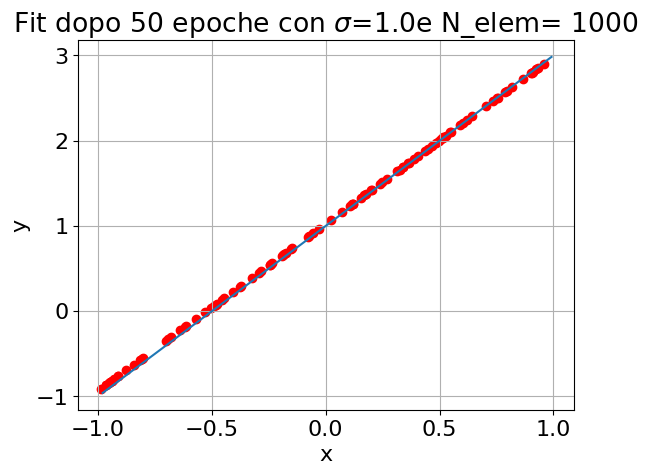

4/4 [==============================] - 0s 789us/step


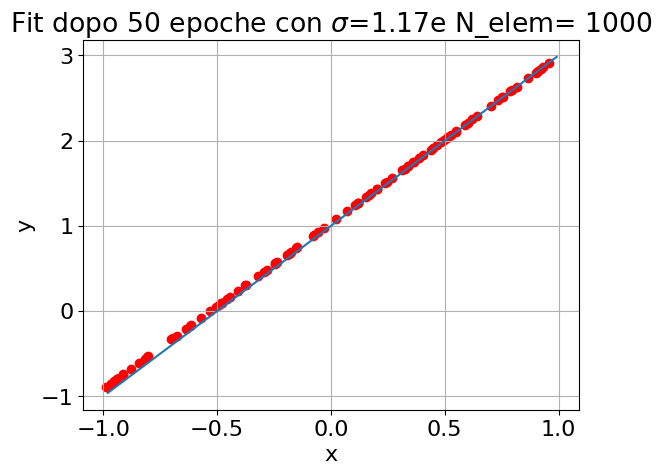

4/4 [==============================] - 0s 619us/step


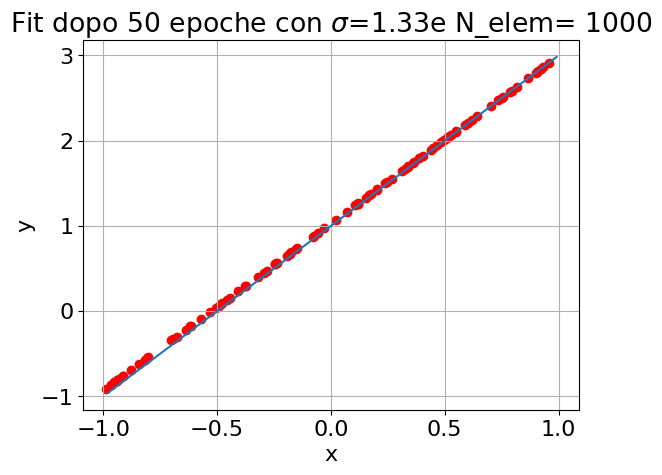

4/4 [==============================] - 0s 770us/step


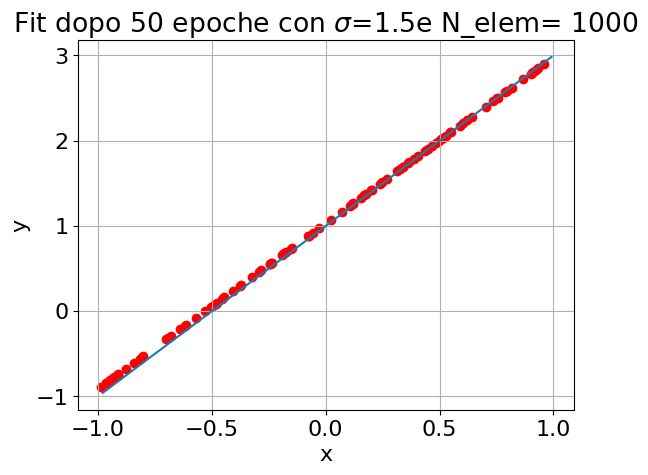

In [11]:
slope_s = []
interc_s = []
for i in range(len(sigma_N)):
    models(sigma_N[i],1000,50,ep=False)
    slope_s.append(pesi[-1][0][0][0])
    interc_s.append(pesi[-1][1][0])

I fit sembrano venire bene nonostante l'aumentare della sigma, anche se si nota una leggera variazione dalla "retta reale".

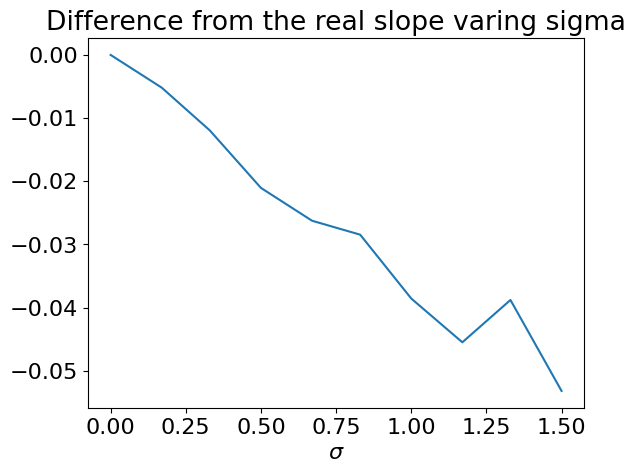

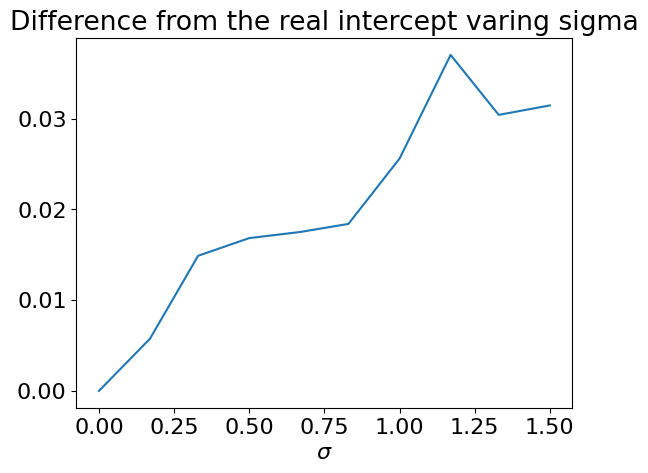

In [12]:
slope_s=[x-m for x in slope_s]
interc_s=[x-b for x in interc_s]
plt.title("Difference from the real slope varing sigma")
plt.xlabel("$\sigma$")
plt.plot(sigma_N,slope_s)
plt.show()
plt.title("Difference from the real intercept varing sigma")
plt.xlabel("$\sigma$")
plt.plot(sigma_N,interc_s)
plt.show()

As it should be the bigger the noise the more difficult it is to fit the data.